In [54]:
#name:gal horesh id: 311306187
#name:samaa arar id:322983370

In [55]:
#קריאת הקובץ
import pandas as pd
csv_file=pd.read_csv("spam_ham_dataset.csv")

In [56]:
#2
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
csv_file['tokenized_sents'] = csv_file.apply(lambda row: word_tokenize(row['text']), axis=1)
csv_file['english']=csv_file.apply(lambda row: ([c for c in row['tokenized_sents'] if  (c not in string.punctuation and c not in stopwords.words('english'))]),axis=1)
csv_file.head()

,Unnamed: 0,label,text,label_num,tokenized_sents,english
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,"[Subject, :, enron, methanol, ;, meter, #, :, ...","[Subject, enron, methanol, meter, 988291, foll..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[Subject, :, hpl, nom, for, january, 9, ,, 200...","[Subject, hpl, nom, january, 9, 2001, see, att..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,...","[Subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"[Subject, :, photoshop, ,, windows, ,, office,...","[Subject, photoshop, windows, office, cheap, m..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[Subject, :, re, :, indian, springs, this, dea...","[Subject, indian, springs, deal, book, teco, p..."


C:\Users\Samaa\AppData\Local\Temp\ipykernel_14696\3819906295.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style="seaborn")


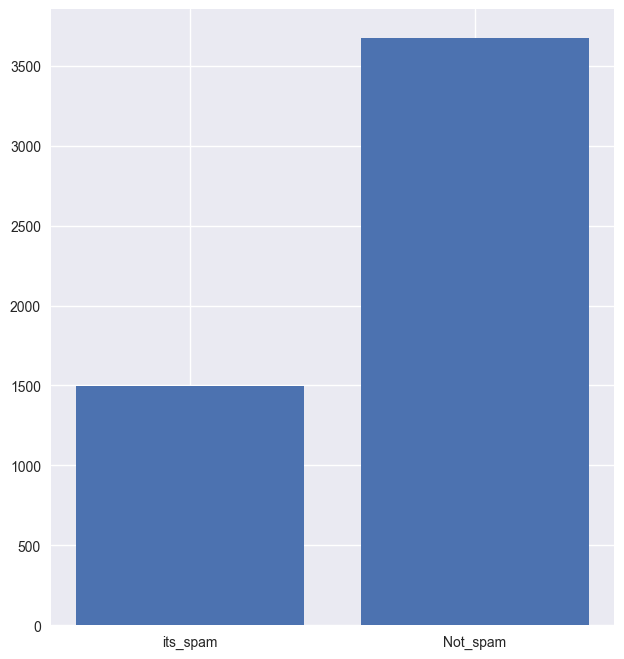

In [57]:
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(style="seaborn")
spam = pd.read_csv('spam_ham_dataset.csv')
spam.head()
spam.label.value_counts()[:5]
spam.text.value_counts()[:5]
its_spam = spam[spam.label_num == 1].shape[0]
not_spam = spam[spam.label_num == 0].shape[0]
plt.figure(1,figsize=(16,8))
plt.subplot(1,2,1)
_ = plt.bar(['its_spam', 'Not_spam'], [its_spam, not_spam])
def plot_target_based_features(feature):
    x1 = spam[spam.label_num == 1][feature]
    x2 = spam[spam.label_num == 0][feature]
    plt.figure(1, figsize=(16,8))
    plt.subplot(1,1,1)
    _ = plt.hist(x2, alpha=0.5, color="grey", bins=50)
    _ = plt.hist(x1, alpha=0.7, color="red", bins=50)
    return _


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [59]:
#4
vectorizer=CountVectorizer()
strings=csv_file.apply(lambda row:' '.join(row['english']),axis=1)
bow = vectorizer.fit(strings)
message_bow=bow.transform(strings)
message_bow.shape
print(message_bow.shape)


(5171, 50300)


In [60]:
#5
tfidf_transformer=TfidfTransformer().fit(message_bow)
message_tfidf=tfidf_transformer.transform(message_bow)
X_train, X_test, y_train, y_test=train_test_split(message_bow,csv_file['label'],test_size=0.3)
spam_detect_model=MultinomialNB().fit(X_train,y_train)
all_pred=spam_detect_model.predict(X_test)

In [61]:
#6
print(classification_report(y_test,all_pred))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98      1124
        spam       0.95      0.97      0.96       428

    accuracy                           0.98      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.98      0.98      0.98      1552



In [62]:
#7
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ("tfidf",TfidfTransformer()),
    ("classifier",MultinomialNB())])
pipeline.fit((X_train),(y_train))
pred=pipeline.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.94      1124
        spam       1.00      0.69      0.82       428

    accuracy                           0.92      1552
   macro avg       0.95      0.85      0.88      1552
weighted avg       0.92      0.92      0.91      1552



In [63]:
#8
from tabulate import tabulate
table_data = [[classification_report(y_test,all_pred)]]
table_data1 = [[classification_report(y_test,pred)]]
print(tabulate(table_data, headers="firstrow",tablefmt="fancy_grid"))
print(tabulate(table_data1, headers="firstrow",tablefmt="fancy_grid"))



╒═════════════════════════════════════════════════════════╕
│               precision    recall  f1-score   support   │
│                                                         │
│          ham       0.99      0.98      0.98      1124   │
│         spam       0.95      0.97      0.96       428   │
│                                                         │
│     accuracy                           0.98      1552   │
│    macro avg       0.97      0.97      0.97      1552   │
│ weighted avg       0.98      0.98      0.98      1552   │
│                                                         │
╞═════════════════════════════════════════════════════════╡
╘═════════════════════════════════════════════════════════╛
╒═════════════════════════════════════════════════════════╕
│               precision    recall  f1-score   support   │
│                                                         │
│          ham       0.90      1.00      0.94      1124   │
│         spam       1.00      0.69     

In [64]:
#9
#הריצה שנתנה את הדיוק הגבוה ביותר היא מודל הערכת הדיוק, ריצה זו מדייקת את המודל ומסייעת להגיע לערכית אופטימליים
#הריצה מודדת באופן מדויק את המדדים לכל תור